## Research : Encephalopathies and Delirium  in CKG

### Pub_6.ED Group_Prediction2_cui_2
#### VI.Supervised Learning ML modeling
    #### 1.Data
    #### 2.Train data and Test Data and NY data 
    #### 3.Convert the pandas dataframes to Numpy arrarys 
    #### 4.min-max scaler to scale both the training and test data so all the values of all features is between 0 and 1
    #### 5.Data Import
    #### 6.Data preprocessing for Machine Learing
   

#### VII. Machine Learning Model_SVM
    #### 1. Linear kernel SVM
    #### 2. SVM-Anova
    #### 3. Apply SVC for NY
    #### 4. Probability for ED in NY group using final SVC model
 
#### VIII. Machine Learning Model_Supervised Learning Random Forest Classifier

_Soo Kyung Bae (Scarlett : K19071757)MSc<br/>
Department of Biostatistics and Health Informatics<br/>
Institute of Psychiatry, Psychology and Neuroscience<br/>
King's College London<br/>_

_Soo Kyung Bae(Scarlett), Ph.D. Student<br/>
Dept. of Integrated Medicine(Major in Digital Healthcare)<br/>
Yonsei University College of Medicine<br/>_

### VI. Supervised Learning ML modeling 

#### 1.Data

In [ ]:
#### 1.1 Data 

In [2]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [238]:
DATA_DIR = "/home/ubuntu/Scarlett/Output_F/"

In [3]:
#admission_all = pd.read_csv(DATA_DIR + "V_27.admission_all.csv")

In [6]:
import pandas as pd
# final cui and admission matrix by admin_id for YY, YN and NN
cui_data_all_admission_F= pd.read_csv(DATA_DIR + "V_29.b.cui_data_all_admission_F.csv")


In [7]:
#print(admission_all.shape)
#admission_all.columns

In [7]:
cui_data_all_admission_F.head()

,Unnamed: 0,hadm_id,admittime,ED_icd,ED,Unnamed: 0.1,group,subject_id,C0000294,C0000378,...,C4547016,C4547044,C4547399,C4547876,C4547937,C4549080,C4549234,C4550347,C4551285,C4551329
0,0,190539,2186-11-21 07:15:00,1,1,3826,YY,49,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,114585,2194-10-16 12:48:00,1,1,3827,YY,115,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,191817,2165-05-06 18:38:00,1,1,3828,YY,133,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,197273,2188-10-06 23:56:00,1,1,3829,YY,214,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,105694,2157-05-01 05:19:00,1,1,3830,YY,223,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Merge features( because 'data_cui2vec' after excluding iserror=1) and ylabel('admission_all' before excluding iserror=1)
data = cui_data_all_admission_F.drop(['admittime','ED_icd'], axis=1)
print(data.shape)
data.head()

(7308, 43192)


,Unnamed: 0,hadm_id,ED,Unnamed: 0.1,group,subject_id,C0000294,C0000378,C0000473,C0000477,...,C4547016,C4547044,C4547399,C4547876,C4547937,C4549080,C4549234,C4550347,C4551285,C4551329
0,0,190539,1,3826,YY,49,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,114585,1,3827,YY,115,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,191817,1,3828,YY,133,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,197273,1,3829,YY,214,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,105694,1,3830,YY,223,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# label values 0: non ED patients, 1: ED patients
data.ED.value_counts()
#df = df['col'].value_counts().reset_index()

1    3663
0    3645
Name: ED, dtype: int64

In [10]:
data.to_csv(DATA_DIR + "V_31F.Data_allcui_F.csv", index=True)

#### 2. Train data and Test Data and NY data 

In [1]:
###########################################
###########Train data and Test Data and NY data 

In [4]:
import pandas as pd
# final cui and admission matrix by admin_id for YY, YN and NN
data= pd.read_csv(DATA_DIR + "V_31F.Data_allcui_F.csv")


In [12]:
# 1.2. Split data into train and test(8:2)

In [5]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'hadm_id', 'ED', 'Unnamed: 0.1.1',
       'group', 'subject_id', 'C0000294', 'C0000378', 'C0000473',
       ...
       'C4547016', 'C4547044', 'C4547399', 'C4547876', 'C4547937', 'C4549080',
       'C4549234', 'C4550347', 'C4551285', 'C4551329'],
      dtype='object', length=43193)

In [6]:
import numpy as np
np.random.seed(1234)

In [7]:
print(data.shape)
data_s_l = data['subject_id'].unique().tolist()
print(len(data_s_l))
data_subject=pd.DataFrame(data_s_l).reset_index()

print(data_subject.shape)
data_subject.head()

(7308, 43193)
6922
(6922, 2)


,index,0
0,0,49
1,1,115
2,2,133
3,3,214
4,4,223


In [8]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [9]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data_subject, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 5537
No. of testing examples: 1385


In [10]:
training_data.head()

,index,0
6396,6396,67397
470,470,13345
3430,3430,82128
1863,1863,57190
6489,6489,73048


In [11]:
#training_list=training_data['subject_id'].unique().tolist()
#testing_list=testing_data['subject_id'].unique().tolist()

training_list=training_data[0].unique().tolist()
testing_list=testing_data[0].unique().tolist()

#data
training_data = data.loc[data['subject_id'].isin (training_list),:]
testing_data = data.loc[data['subject_id'].isin (testing_list),:]


In [12]:
# ED label values on training and testing 
print(training_data.ED.value_counts())
print(testing_data.ED.value_counts())

1    2921
0    2908
Name: ED, dtype: int64
1    742
0    737
Name: ED, dtype: int64


In [13]:
print(training_data.ED.value_counts())
training_data.shape

1    2921
0    2908
Name: ED, dtype: int64


(5829, 43193)

In [22]:
#training_data.head()

In [14]:
import pandas as pd
# NY data for cui2vec features and all cui features
NY_cui_data_F= pd.read_csv(DATA_DIR + "V_26.4.NY_cui_data_F.csv")

In [15]:
data.head()

,Unnamed: 0,Unnamed: 0.1,hadm_id,ED,Unnamed: 0.1.1,group,subject_id,C0000294,C0000378,C0000473,...,C4547016,C4547044,C4547399,C4547876,C4547937,C4549080,C4549234,C4550347,C4551285,C4551329
0,0,0,190539,1,3826,YY,49,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,114585,1,3827,YY,115,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,191817,1,3828,YY,133,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,197273,1,3829,YY,214,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,105694,1,3830,YY,223,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
data_NN_ids=data.loc[(data.group=='NN'),'subject_id'].unique().tolist()
data_YY_ids=data.loc[(data.group=='YY'),'subject_id'].unique().tolist()
data_YN_ids=data.loc[(data.group=='YN'),'subject_id'].unique().tolist()
print(len(data_NN_ids))
print(len(data_YY_ids))
print(len(data_YN_ids))

3448
3293
181


In [17]:
# data tain and test

In [18]:
# #data_m=data.drop(["Unnamed: 0","group","subject_id","admittime"],axis=1)
ED_train=training_data.drop(["Unnamed: 0","group","subject_id","ED"],axis=1)
ED_test=testing_data.drop(["Unnamed: 0","group","subject_id","ED"],axis=1)


ED_train_labels=training_data[['ED']]
ED_test_labels=testing_data[['ED']]

In [19]:
# NY data 
NY_cui_data_F.columns

Index(['Unnamed: 0', 'group', 'subject_id', 'hadm_id', 'C0000039', 'C0000167',
       'C0000294', 'C0000378', 'C0000477', 'C0000503',
       ...
       'C4547044', 'C4547356', 'C4547399', 'C4547431', 'C4547937', 'C4551231',
       'C4551285', 'C4551329', 'C4551390', 'C4551415'],
      dtype='object', length=45706)

In [20]:
ED_NY=NY_cui_data_F.drop(["Unnamed: 0","group","subject_id"],axis=1)

In [21]:
# describe() function returns summary statistics of the columns (features)
ED_train_labels.describe()

,ED
count,5829.000000
mean,0.501115
std,0.500042
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


#### 3.Convert the pandas dataframes to Numpy arrarys 

In [22]:
#1)Convert the pandas dataframes to Numpy arrarys named X_Train, X_Val and X_Test
X_train = ED_train.values
X_test = ED_test.values

print(X_train.shape)
print(X_test.shape)


(5829, 43189)
(1479, 43189)


In [24]:
# NY
X_NY=ED_NY.values
print(X_NY.shape)

(7155, 45703)


#### 4. min-max scaler to scale both the training and test data so all the values of all features is between 0 and 1

In [25]:
# 2) _min-max scaler to scale both the training, development, and test data so all the values of all features is between 0 and 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)

X_test_scaled = min_max_scaler.transform(X_test)

In [26]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_NY_scaled = min_max_scaler.fit_transform(X_NY)

In [27]:
# Essentially, Keras is expecting the labeling to start at zero

In [28]:
#ED_train_labels.head() 
#ED_train_labels['ED']
#pd.DataFrame(cui_data_all_admission_F).reset_index()

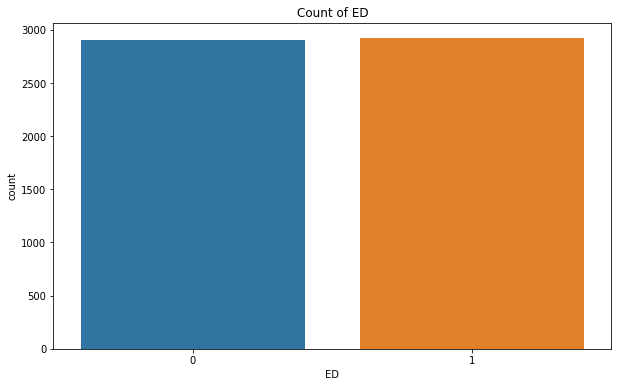

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig , ax = plt.subplots(figsize=(6,4))
fig , ax = plt.subplots(figsize=(10,6))
sns.countplot(x='ED', data= pd.DataFrame(ED_train_labels['ED'].reset_index()))
plt.title("Count of ED")
plt.show()

In [30]:
# 1. ED_labels classificaiton vlues to 1 (ED),  0 (not ED)
import numpy as np
from sklearn import preprocessing

#le = preprocessing.LabelEncoder()
#le.fit(['C', 'NC'])
#y_train = le.transform(np.ravel(speech_train_labels))


y_train = np.ravel(ED_train_labels)
print(y_train.shape)


(5829,)


In [31]:
y_test = np.ravel(ED_test_labels)
print(y_test.shape)

(1479,)


In [32]:
#X_train_scaled

In [33]:
training_data.columns[5]

'group'

In [34]:
temp = training_data
test= testing_data

In [35]:
stat= temp.describe()
stat

,Unnamed: 0,Unnamed: 0.1,hadm_id,ED,Unnamed: 0.1.1,subject_id,C0000294,C0000378,C0000473,C0000477,...,C4547016,C4547044,C4547399,C4547876,C4547937,C4549080,C4549234,C4550347,C4551285,C4551329
count,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,...,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000
mean,3645.851776,3645.851776,150202.974095,0.501115,3642.698233,40454.055241,0.000172,0.000343,0.001716,0.001201,...,0.000172,0.000858,0.127981,0.000343,0.002402,0.000172,0.000172,0.000172,0.032596,0.000172
std,2101.939206,2101.939206,28969.007095,0.500042,2111.778615,29680.002373,0.013098,0.026196,0.130979,0.034636,...,0.013098,0.039288,1.184327,0.026196,0.097995,0.013098,0.013098,0.013098,0.207861,0.013098
min,1.000000,1.000000,100017.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1827.000000,1827.000000,125212.000000,0.000000,1804.000000,14671.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3654.000000,3654.000000,150435.000000,1.000000,3652.000000,30454.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5459.000000,5459.000000,175352.000000,1.000000,5468.000000,66228.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7306.000000,7306.000000,199957.000000,1.000000,7307.000000,99936.000000,1.000000,2.000000,10.000000,1.000000,...,1.000000,2.000000,69.000000,2.000000,7.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [36]:
import pandas as pd
stat=pd.DataFrame(stat).reset_index()
res=stat


In [37]:
res.columns

Index(['index', 'Unnamed: 0', 'Unnamed: 0.1', 'hadm_id', 'ED',
       'Unnamed: 0.1.1', 'subject_id', 'C0000294', 'C0000378', 'C0000473',
       ...
       'C4547016', 'C4547044', 'C4547399', 'C4547876', 'C4547937', 'C4549080',
       'C4549234', 'C4550347', 'C4551285', 'C4551329'],
      dtype='object', length=43193)

In [38]:
res.head()

,index,Unnamed: 0,Unnamed: 0.1,hadm_id,ED,Unnamed: 0.1.1,subject_id,C0000294,C0000378,C0000473,...,C4547016,C4547044,C4547399,C4547876,C4547937,C4549080,C4549234,C4550347,C4551285,C4551329
0,count,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,...,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000
1,mean,3645.851776,3645.851776,150202.974095,0.501115,3642.698233,40454.055241,0.000172,0.000343,0.001716,...,0.000172,0.000858,0.127981,0.000343,0.002402,0.000172,0.000172,0.000172,0.032596,0.000172
2,std,2101.939206,2101.939206,28969.007095,0.500042,2111.778615,29680.002373,0.013098,0.026196,0.130979,...,0.013098,0.039288,1.184327,0.026196,0.097995,0.013098,0.013098,0.013098,0.207861,0.013098
3,min,1.000000,1.000000,100017.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25%,1827.000000,1827.000000,125212.000000,0.000000,1804.000000,14671.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
res.iloc[7,0]

'max'

In [49]:
res.shape
res.columns[7:res.shape[1]]

Index(['C0000294', 'C0000378', 'C0000473', 'C0000477', 'C0000481', 'C0000503',
       'C0000608', 'C0000618', 'C0000726', 'C0000727',
       ...
       'C4547016', 'C4547044', 'C4547399', 'C4547876', 'C4547937', 'C4549080',
       'C4549234', 'C4550347', 'C4551285', 'C4551329'],
      dtype='object', length=43186)

In [41]:
res.columns[7:res.shape[1]]

Index(['C0000294', 'C0000378', 'C0000473', 'C0000477', 'C0000481', 'C0000503',
       'C0000608', 'C0000618', 'C0000726', 'C0000727',
       ...
       'C4547016', 'C4547044', 'C4547399', 'C4547876', 'C4547937', 'C4549080',
       'C4549234', 'C4550347', 'C4551285', 'C4551329'],
      dtype='object', length=43186)

In [50]:
X_train_list=res.columns[7:res.shape[1]]
print(X_train_list[0])
print(res.iloc[5,6])
print(res.iloc[7,0])
#X_train_list
print(res[X_train_list[0]][7])
print(res[X_train_list[1]][7])

res['index'][7]

C0000294
30454.0
max
1.0
2.0


'max'

In [51]:
# slecting cui as features if only its max(count) >= 10 

In [52]:
t_list=[]
for col in X_train_list:
    if res[col][7] >= 10:
        t_list.append(col)
        #res2 = res.drop(col,axis=1)

In [53]:
#t_list

In [54]:
# insert info.
t_list.insert(0,'subject_id')

In [55]:
#t_list

In [56]:
t_list.insert(1,'group')
#t_list

In [57]:
t_list.insert(2,'ED')
#t_list

In [58]:
t_list.insert(3,'hadm_id')
#t_list

In [59]:
t_list

['subject_id',
 'group',
 'ED',
 'hadm_id',
 'C0000473',
 'C0000503',
 'C0000726',
 'C0000727',
 'C0000729',
 'C0000731',
 'C0000734',
 'C0000737',
 'C0000739',
 'C0000768',
 'C0000786',
 'C0000833',
 'C0000889',
 'C0000921',
 'C0000924',
 'C0000925',
 'C0000938',
 'C0000970',
 'C0000975',
 'C0000981',
 'C0001047',
 'C0001074',
 'C0001122',
 'C0001125',
 'C0001126',
 'C0001127',
 'C0001128',
 'C0001138',
 'C0001168',
 'C0001175',
 'C0001275',
 'C0001288',
 'C0001306',
 'C0001339',
 'C0001347',
 'C0001367',
 'C0001403',
 'C0001418',
 'C0001425',
 'C0001430',
 'C0001443',
 'C0001465',
 'C0001483',
 'C0001511',
 'C0001514',
 'C0001554',
 'C0001555',
 'C0001593',
 'C0001623',
 'C0001625',
 'C0001632',
 'C0001645',
 'C0001675',
 'C0001699',
 'C0001701',
 'C0001712',
 'C0001721',
 'C0001727',
 'C0001758',
 'C0001762',
 'C0001779',
 'C0001792',
 'C0001807',
 'C0001818',
 'C0001825',
 'C0001868',
 'C0001883',
 'C0001899',
 'C0001924',
 'C0001948',
 'C0001957',
 'C0001962',
 'C0001967',
 'C0001

In [60]:
# apply selected cuis  to train data 
training_data2=training_data.loc[:, t_list]

In [61]:
training_data2.head()

,subject_id,group,ED,hadm_id,C0000473,C0000503,C0000726,C0000727,C0000729,C0000731,...,C4533256,C4533435,C4533677,C4534306,C4534314,C4534363,C4534364,C4540159,C4546278,C4547399
1,115,YY,1,114585,0.0,0.0,41.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,133,YY,1,191817,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0
3,214,YY,1,197273,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
4,223,YY,1,105694,0.0,0.0,14.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,266,YY,1,186251,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
training_data2.to_csv(DATA_DIR + "V_32F.Data_reducedcui_F_train_df.csv", index=True)

In [63]:
train2=training_data2
train2.head()

,subject_id,group,ED,hadm_id,C0000473,C0000503,C0000726,C0000727,C0000729,C0000731,...,C4533256,C4533435,C4533677,C4534306,C4534314,C4534363,C4534364,C4540159,C4546278,C4547399
1,115,YY,1,114585,0.0,0.0,41.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,133,YY,1,191817,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0
3,214,YY,1,197273,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
4,223,YY,1,105694,0.0,0.0,14.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,266,YY,1,186251,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# apply selected cuis  to test data 
test2=test.loc[:, t_list]

In [65]:
test2.head()

,subject_id,group,ED,hadm_id,C0000473,C0000503,C0000726,C0000727,C0000729,C0000731,...,C4533256,C4533435,C4533677,C4534306,C4534314,C4534363,C4534364,C4540159,C4546278,C4547399
0,49,YY,1,190539,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,273,YY,1,158689,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,314,YY,1,155540,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,345,YY,1,169339,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18,587,YY,1,150352,0.0,0.0,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
test2.to_csv(DATA_DIR + "V_32F.Data_reducedcui_F_test_df.csv", index=True)

#### 5. Data Import

In [ ]:
# Import train and test data for modeling (reduced cuis from 43190 to 10243)

In [1]:
DATA_DIR = "/home/ubuntu/Scarlett/Output_F/"

In [2]:
import pandas as pd

train2=pd.read_csv(DATA_DIR + "V_32F.Data_reducedcui_F_train_df.csv")
test2=pd.read_csv(DATA_DIR + "V_32F.Data_reducedcui_F_test_df.csv")

In [3]:
train2.head()

,Unnamed: 0,subject_id,group,ED,hadm_id,C0000473,C0000503,C0000726,C0000727,C0000729,...,C4533256,C4533435,C4533677,C4534306,C4534314,C4534363,C4534364,C4540159,C4546278,C4547399
0,1,115,YY,1,114585,0.0,0.0,41.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2,133,YY,1,191817,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0
2,3,214,YY,1,197273,0.0,0.0,5.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
3,4,223,YY,1,105694,0.0,0.0,14.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,266,YY,1,186251,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train2.describe()

,Unnamed: 0,subject_id,ED,hadm_id,C0000473,C0000503,C0000726,C0000727,C0000729,C0000731,...,C4533256,C4533435,C4533677,C4534306,C4534314,C4534363,C4534364,C4540159,C4546278,C4547399
count,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,...,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000,5829.000000
mean,3645.851776,40454.055241,0.501115,150202.974095,0.001716,0.007548,10.036027,0.010465,0.019214,0.330417,...,0.028307,1.541088,0.097444,0.069823,0.004289,1.036713,0.007720,0.004804,0.002745,0.127981
std,2101.939206,29680.002373,0.500042,28969.007095,0.130979,0.255908,25.843739,0.366390,0.368139,2.282608,...,0.321482,7.814306,1.435448,0.693951,0.327448,4.423919,0.218661,0.366742,0.209567,1.184327
min,1.000000,8.000000,0.000000,100017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1827.000000,14671.000000,0.000000,125212.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3654.000000,30454.000000,1.000000,150435.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5459.000000,66228.000000,1.000000,175352.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7306.000000,99936.000000,1.000000,199957.000000,10.000000,12.000000,873.000000,25.000000,17.000000,78.000000,...,13.000000,177.000000,68.000000,32.000000,25.000000,151.000000,15.000000,28.000000,16.000000,69.000000


In [5]:
# NY data for cui2vec features and all cui features
import pandas as pd
# NY data for cui2vec features and all cui features
#NY_cui_data_F= pd.read_csv(DATA_DIR + "V_26.4.NY_cui_data_F.csv')

In [6]:
print(train2.shape)
print(test2.shape)

(5829, 10244)
(1479, 10244)


In [72]:
NY_cui_data_F.shape

(7155, 45706)

In [73]:
train2.columns

Index(['Unnamed: 0', 'subject_id', 'group', 'ED', 'hadm_id', 'C0000473',
       'C0000503', 'C0000726', 'C0000727', 'C0000729',
       ...
       'C4533256', 'C4533435', 'C4533677', 'C4534306', 'C4534314', 'C4534363',
       'C4534364', 'C4540159', 'C4546278', 'C4547399'],
      dtype='object', length=10244)

In [74]:
#selected cuis
#t_list=train2.columns[4:train2.shape[1]].tolist()
t_list=train2.columns

In [75]:
t_list

Index(['Unnamed: 0', 'subject_id', 'group', 'ED', 'hadm_id', 'C0000473',
       'C0000503', 'C0000726', 'C0000727', 'C0000729',
       ...
       'C4533256', 'C4533435', 'C4533677', 'C4534306', 'C4534314', 'C4534363',
       'C4534364', 'C4540159', 'C4546278', 'C4547399'],
      dtype='object', length=10244)

In [76]:
#NY_cui_data_F.columns.tolist() matched with t_list
n_list=NY_cui_data_F.columns.tolist()

In [77]:
#NY_2_cui_data_F
#n_2_list=NY_2_cui_data_F.columns.tolist()

In [78]:
len(t_list)

10244

In [79]:
len(n_list)

45706

In [80]:
#len(n_2_list)

In [81]:
#NY sampl1
#def common_elements(list1, list2):
#    return list(set(list1) & set(list2))
#f_list=common_elements(t_list, n_list)
f_list=set(t_list) & set(n_list)
f_list=list(f_list)
print(len(f_list))

10025


In [82]:
#f_list :NY sample1

In [83]:
f_list.insert(0,'subject_id')

In [84]:
f_list.insert(1,'group')

In [85]:
f_list.insert(2,'hadm_id')

In [86]:
NY_cui_data_F.columns

Index(['Unnamed: 0', 'group', 'subject_id', 'hadm_id', 'C0000039', 'C0000167',
       'C0000294', 'C0000378', 'C0000477', 'C0000503',
       ...
       'C4547044', 'C4547356', 'C4547399', 'C4547431', 'C4547937', 'C4551231',
       'C4551285', 'C4551329', 'C4551390', 'C4551415'],
      dtype='object', length=45706)

In [87]:
# apply selected cuis  to NY data 
ED_NY=NY_cui_data_F.loc[:, f_list]
#X_NY_scaled 

In [88]:
print(ED_NY.shape)

(7155, 10028)


In [89]:
# Train NY

In [90]:
# apply selected cuis in NY  sample1 to train data ( for NY group prediction)
train2_NY=train2.loc[:, f_list]
print(train2_NY.shape)

(5829, 10028)


In [91]:
# apply selected cuis in NY  sample1 to test data ( for NY group prediction)
test2_NY=test2.loc[:, f_list]
print(test2_NY.shape)

(1479, 10028)


In [92]:
ED_NY.head()

,subject_id,group,hadm_id,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,12,NY,112213,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,21,NY,109451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
2,21,NY,111970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,4.0
3,37,NY,188670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.0,0.0,2.0,0.0,0.0,0.0
4,38,NY,185910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0


In [93]:
train2_NY.head()

,subject_id,group,hadm_id,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,115,YY,114585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1,133,YY,191817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,214,YY,197273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,1.0
3,223,YY,105694,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,5.0,0.0,0.0,3.0
4,266,YY,186251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
test2_NY.head()

,subject_id,group,hadm_id,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,49,YY,190539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,273,YY,158689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,314,YY,155540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0
3,345,YY,169339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0
4,587,YY,150352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,5.0


In [95]:
# output: NY sample1

ED_NY.to_csv(DATA_DIR + "V_33F.Data_reducedcui_ED_NY_df.csv", index=True)
train2_NY.to_csv(DATA_DIR + "V_33F2.Data_reducedcui_train for NY_df.csv", index=True)
test2_NY.to_csv(DATA_DIR + "V_33F2.Data_reducedcui_test for NY_df.csv", index=True)

In [ ]:
###############################################################
##### data for modeling

In [ ]:
# 1. data

In [7]:
# 1. data
ED_train=train2.drop(["group","subject_id","ED"],axis=1)
ED_test=test2.drop(["group","subject_id","ED"],axis=1)

ED_train_labels=train2[['ED']]
ED_test_labels=test2[['ED']]

In [8]:
ED_train.columns

Index(['Unnamed: 0', 'hadm_id', 'C0000473', 'C0000503', 'C0000726', 'C0000727',
       'C0000729', 'C0000731', 'C0000734', 'C0000737',
       ...
       'C4533256', 'C4533435', 'C4533677', 'C4534306', 'C4534314', 'C4534363',
       'C4534364', 'C4540159', 'C4546278', 'C4547399'],
      dtype='object', length=10241)

In [98]:
ED_train_labels

,ED
0,1
1,1
2,1
3,1
4,1
...,...
5824,0
5825,0
5826,0
5827,0


In [99]:
# ED_NY data import

In [100]:
train2_NY.head()

,subject_id,group,hadm_id,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,115,YY,114585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1,133,YY,191817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,214,YY,197273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,1.0
3,223,YY,105694,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,5.0,0.0,0.0,3.0
4,266,YY,186251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
ED_NY2=ED_NY.drop(["group","subject_id"],axis=1)
ED_train2_NY =train2_NY.drop(["group","subject_id"],axis=1)

In [102]:
# ED_test2_NY ,ED_test2_NY_2
ED_test2_NY =test2_NY.drop(["group","subject_id"],axis=1)


In [103]:
ED_train2_NY.head()

,hadm_id,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,C0076107,C0085681,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,114585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1,191817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,197273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,1.0
3,105694,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,5.0,0.0,0.0,3.0
4,186251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#ED_train , ED_test, ED_train_labels, ED_test_labels

In [9]:
# drop 'Unnamed: 0', 'hadm_id'

ED_train=ED_train.drop(["Unnamed: 0","hadm_id"],axis=1)
ED_test=ED_test.drop(["Unnamed: 0","hadm_id"],axis=1)


In [10]:
print(ED_train.shape)
print(ED_test.shape)

(5829, 10239)
(1479, 10239)


In [104]:
# drop 'Unnamed: 0', 'hadm_id'

ED_train=ED_train.drop(["Unnamed: 0","hadm_id"],axis=1)
ED_test=ED_test.drop(["Unnamed: 0","hadm_id"],axis=1)

#ED_NY2=ED_NY2.drop(["Unnamed: 0","hadm_id"],axis=1)
ED_NY2=ED_NY2.drop(["hadm_id"],axis=1)
#ED_train2_NY =ED_train2_NY.drop(["Unnamed: 0","hadm_id"],axis=1)
ED_train2_NY =ED_train2_NY.drop(["hadm_id"],axis=1)
#ED_test2_NY =ED_test2_NY.drop(["Unnamed: 0","hadm_id"],axis=1)
ED_test2_NY =ED_test2_NY.drop(["hadm_id"],axis=1)

In [105]:
print(ED_train.shape)
print(ED_test.shape)
print(ED_NY2.shape)
print(ED_train2_NY.shape)
print(ED_test2_NY.shape)

(5829, 10239)
(1479, 10239)
(7155, 10022)
(5829, 10022)
(1479, 10022)


In [266]:
ED_test2_NY.head()

,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,C0076107,C0085681,C1456357,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,4.0,0.0,1.0,0.0,0.0,5.0


In [106]:
ED_train2_NY.head()

,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,C0076107,C0085681,C1456357,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,5.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 6.Data preprocessing for Machine Learing

In [287]:
len(list(set(ED_train.columns)-set(ED_train2_NY.columns)))

218

In [285]:
ED_train2_NY.columns

Index(['C1281583', 'C0189661', 'C0234192', 'C0368753', 'C0520679', 'C0005854',
       'C0447546', 'C0076107', 'C0085681', 'C1456357',
       ...
       'C1124883', 'C0883208', 'C0149512', 'C0456637', 'C1522565', 'C0520880',
       'C0459471', 'C0224440', 'C4316741', 'C0332257'],
      dtype='object', length=10022)

In [107]:
ED_train.head()

,C0000473,C0000503,C0000726,C0000727,C0000729,C0000731,C0000734,C0000737,C0000739,C0000768,...,C4533256,C4533435,C4533677,C4534306,C4534314,C4534363,C4534364,C4540159,C4546278,C4547399
0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0
2,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
3,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
ED_NY2.head()

,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,C0076107,C0085681,C1456357,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
#ED_train , ED_test, ED_train_labels, ED_test_labels

In [11]:
# 2.1 Data preprocessing for Machine Learing
#1)Convert the pandas dataframes to Numpy arrarys named X_Train, X_Val and X_Test
X_train = ED_train.values
X_test = ED_test.values

print(X_train.shape)
print(X_test.shape)


(5829, 10239)
(1479, 10239)


In [268]:
X_train

array([[ 0.,  0., 41., ...,  0.,  0.,  2.],
       [ 0.,  0.,  8., ...,  0.,  0.,  1.],
       [ 0.,  0.,  5., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.]])

In [12]:
#2.2 _min-max scaler to scale both the training, development, and test data so all the values of all features is between 0 and 1
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)

X_test_scaled = min_max_scaler.transform(X_test)

In [13]:
# 2.3 ED_labels classificaiton vlues to 1 (ED),  0 (not ED)
import numpy as np
from sklearn import preprocessing

y_train = np.ravel(ED_train_labels)
print(y_train.shape)

y_test = np.ravel(ED_test_labels)
print(y_test.shape)

(5829,)
(1479,)


In [271]:
# NY data 

In [272]:
# NY data :smaple1
X_NY = ED_NY2.values
X_TR_NY=ED_train2_NY.values
print(X_NY.shape)
print(X_TR_NY.shape)

(7155, 10022)
(5829, 10022)


In [273]:
# ED_test2_NY ,ED_test2_NY_2
X_TEST_NY=ED_test2_NY.values
print(X_TEST_NY.shape)

(1479, 10022)


In [116]:
#X_TR_NY,X_TEST_NY,X_NY  : X_TR_NY_2,X_TEST_NY_2, X_NY_2

In [274]:
X_TR_NY

array([[0., 0., 0., ..., 0., 0., 3.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [275]:
#X_TR_NY
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
# NY data
X_train_NY_scaled = min_max_scaler.fit_transform(X_TR_NY)
#X_train_NY_scaled = min_max_scaler.fit_transform(ED_train2_NY)
X_NY_scaled = min_max_scaler.transform(X_NY)

#X_NY_scaled = min_max_scaler.transform(ED_NY2)

X_TEST_NY_scaled = min_max_scaler.fit_transform(X_TEST_NY)

#X_train_scaled, X_test_scaled, X_NY_scaled, X_train_NY_scaled

In [276]:
#X_train_NY_scaled,X_TEST_NY_scaled,X_NY_scaled  : X_train_NY_scaled_2,X_TEST_NY_scaled_2,X_NY_scaled_2


In [277]:
#X_train_scaled, X_test_scaled, X_NY_scaled, X_train_NY_scaled
print(X_NY_scaled.shape)
print(X_train_NY_scaled.shape)
print(X_TEST_NY_scaled.shape)

(7155, 10022)
(5829, 10022)
(1479, 10022)


### VII. Machine Learning Model_SVM

In [14]:
###
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import Normalize

import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, cross_val_score,  train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
import numpy as np
np.random.seed(1234)

#### 1. Linear kernel SVM

In [16]:
print(X_train_scaled.shape, y_train.shape)

(5829, 10239) (5829,)


In [18]:
print(X_test_scaled.shape, y_test.shape)

# #X_train_scaled, X_test_scaled, X_NY_scaled, X_train_NY_scaled
#X_NY_scaled.shape

(1479, 10239) (1479,)


#### 1.1.Linear SVC Perform a suitable grid-search to find a reasonable set-up of your chosen classifier

In [282]:
# 1. SVC : linear (parameter tuning)

In [283]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.


C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_range:
    for gamma in gamma_range:
        clf = SVC(kernel='linear', C=C, gamma=gamma)
        clf.fit(X_train_scaled, y_train)
        classifiers.append((C, gamma, clf))
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train_scaled, y_train)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


The best parameters are {'C': 100.0, 'gamma': 0.1} with a score of 0.85


In [ ]:
#2. SCV lineea 5-fold CV training and test perfomance measures

In [19]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# SVM kernel='linear' best : 'C': 100, 'gamma': 0.1
c=100
gamma=0.1

# Linear kernel SVM
svm_L = SVC(kernel='linear', C=c, gamma=gamma, random_state=42) 
#svm_L.fit(X_train_scaled, y_train)


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_L, X_train_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Cross-validated scores: [0.85077187 0.86363636 0.84133791 0.87307033 0.84806867]
Accuracy: 0.855 (0.011)


In [20]:
#perform prediction on X_test_scaled
y_pred = cross_val_predict(svm_L, X_test_scaled, y_test, cv=5)
#plt.scatter(y_test, y_pred)

Classification of SVM linear: Accuracy 0.825
Unweighted Recall of the model is : 0.8249


<AxesSubplot:>

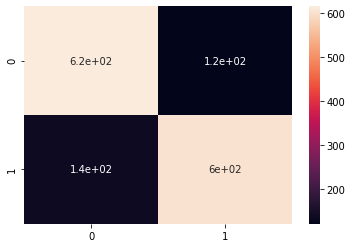

In [21]:
# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_test= accuracy_score(y_test, y_pred)
print( "Classification of SVM linear: Accuracy " + str(round(accuracy_test,3)))
UAR = recall_score(y_test, y_pred , average="macro")
print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [22]:
print(cf_matrix)
# Classification report, includes accuracy
print(classification_report(y_test, y_pred))

[[616 121]
 [138 604]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       737
           1       0.83      0.81      0.82       742

    accuracy                           0.82      1479
   macro avg       0.83      0.82      0.82      1479
weighted avg       0.83      0.82      0.82      1479



In [129]:
#2.2 SCV lineea 5-fold CV training and test perfomance measures
##  :(X_train_NY_scaled, y_train) X_TEST_NY_scaled

In [292]:
import numpy as np
np.random.seed(1234)

In [293]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# SVM kernel='linear' best : 'C': 1.0, 'gamma': 0.1
c=100
gamma=0.1

# Linear kernel SVM
svm_L = SVC(kernel='linear', C=c, gamma=gamma, random_state=42) 
#svm_L.fit(X_train_scaled, y_train)


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_L, X_train_NY_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Cross-validated scores: [0.9922813  0.9897084  0.99313894 0.99056604 0.99141631]
Accuracy: 0.991 (0.001)


In [294]:
#perform prediction on X_test_scaled
y_pred = cross_val_predict(svm_L, X_TEST_NY_scaled, y_test, cv=5)
#plt.scatter(y_test, y_pred)

Classification of SVM linear: Accuracy 0.984
Unweighted Recall of the model is : 0.9838


<AxesSubplot:>

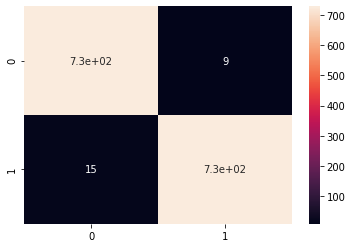

In [295]:
# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_test= accuracy_score(y_test, y_pred)
print( "Classification of SVM linear: Accuracy " + str(round(accuracy_test,3)))
UAR = recall_score(y_test, y_pred , average="macro")
print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [296]:
print(cf_matrix)
# Classification report, includes accuracy
print(classification_report(y_test, y_pred))

[[728   9]
 [ 15 727]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       737
           1       0.99      0.98      0.98       742

    accuracy                           0.98      1479
   macro avg       0.98      0.98      0.98      1479
weighted avg       0.98      0.98      0.98      1479



In [144]:
X_train_scaled.shape

(5829, 10239)

In [145]:
# ED

In [146]:
X_NY_scaled.shape

(7155, 10022)

In [147]:
ED_train.columns

Index(['C0000473', 'C0000503', 'C0000726', 'C0000727', 'C0000729', 'C0000731',
       'C0000734', 'C0000737', 'C0000739', 'C0000768',
       ...
       'C4533256', 'C4533435', 'C4533677', 'C4534306', 'C4534314', 'C4534363',
       'C4534364', 'C4540159', 'C4546278', 'C4547399'],
      dtype='object', length=10239)

In [148]:
#ED_train.columns[[range(2,ED_train.shape[1])]].tolist

#### 2. SVM-Anova

Automatically created module for IPython interactive environment


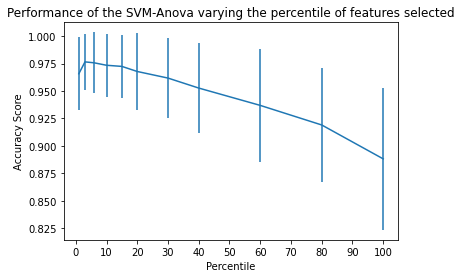

In [118]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# #############################################################################
# Import some data to play with
#X, y = load_iris(return_X_y=True)
X = X_train_scaled
y= y_train
# Add non-informative features
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

In [125]:
score_means

[0.9656789287318077,
 0.9764883428176002,
 0.9756296792526447,
 0.9733992446940863,
 0.9723697907081178,
 0.9677357754400429,
 0.9617314615095811,
 0.9526379022224839,
 0.9368509779960099,
 0.9190094155581239,
 0.8881247653472124]

SVM-Anova: SVM with univariate feature selection
This example shows how to perform univariate feature selection before running a SVC (support vector classifier) to improve the classification scores. We can find that our model achieves best performance when we select around 5%~10% of features.

In [297]:
import numpy as np
np.random.seed(1234)

In [23]:
# feature selection :X_train_scaled,
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import scipy.stats

import numpy as np
np.random.seed(1234)


lsvc = LinearSVC(C=100, penalty="l1", dual=False).fit(X_train_scaled, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_new = model.transform(X_train_scaled)
print(X_train_new.shape)

X_test_new1 = model.transform(X_test_scaled)

c=lsvc.coef_
#selected_feature_names = np.asarray(vectorizer.get_feature_names())[np.flatnonzero(svc.coef_)]

#selected_feature_names = np.asarray(vectorizer.get_feature_names())[np.flatnonzero(svc.coef_)]
#np.asarray(vectorizer.get_feature_names())[list(set(np.where(svc.coef_ != 0)[1]))]

(5829, 1224)


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [299]:
from sklearn.s1224vm import LinearSVC
print(ED_train.columns[model.get_support()]) 

Index(['C0000503', 'C0001168', 'C0001465', 'C0001675', 'C0001779', 'C0001962',
       'C0001969', 'C0002804', 'C0002903', 'C0002965',
       ...
       'C4319718', 'C4319827', 'C4321335', 'C4329648', 'C4489118', 'C4489132',
       'C4489377', 'C4520898', 'C4524504', 'C4524862'],
      dtype='object', length=1224)


In [24]:
sf=ED_train.columns[model.get_support()]
sf_d = pd.DataFrame(sf)

In [301]:
ED_train.columns

Index(['C0000473', 'C0000503', 'C0000726', 'C0000727', 'C0000729', 'C0000731',
       'C0000734', 'C0000737', 'C0000739', 'C0000768',
       ...
       'C4533256', 'C4533435', 'C4533677', 'C4534306', 'C4534314', 'C4534363',
       'C4534364', 'C4540159', 'C4546278', 'C4547399'],
      dtype='object', length=10239)

In [302]:
# Feature names from feature selection

In [25]:
cf = pd.DataFrame(c)
print(cf.shape)
#cf[[2]]
print(cf.iloc[0, 1])
print(cf.iloc[0, 2])
print(cf.iloc[0, 3])
#cf.loc[cf.index[[1]], 2 ]

(1, 10239)
2.185033837941117
0.0
0.0


In [26]:
cf

,0,1,2,3,4,5,6,7,8,9,...,10229,10230,10231,10232,10233,10234,10235,10236,10237,10238
0,0.0,2.185034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
r1=model.get_support()
len(r1)
r1_d = pd.DataFrame(r1)

In [28]:
r1_d

,0
0,False
1,True
2,False
3,False
4,False
...,...
10234,False
10235,False
10236,False
10237,False


In [307]:
ED_train.columns[1]

'C0000503'

In [308]:
ED_train.columns[2]

'C0000726'

In [29]:
column_names = ["feature name","coef","T_F"]
SVC_F_importance = pd.DataFrame(columns = column_names)
SVC_F_importance

,feature name,coef,T_F


In [30]:
for x in range(0,ED_train.shape[1]):
    c2=round(cf.iloc[0, x],3)
    TF1=r1_d.iloc[x, 0].astype(int)
   # print(c2)
    name=[ED_train.columns[x]]
    i=pd.DataFrame(data = zip(name,[c2],[TF1]), columns=['feature name','coef','T_F'])
    SVC_F_importance=SVC_F_importance.append(i)

In [31]:
SVC_F_importance.head()

,feature name,coef,T_F
0,C0000473,0.000,0
0,C0000503,2.185,1
0,C0000726,0.000,0
0,C0000727,0.000,0
0,C0000729,0.000,0


In [32]:
# selected features from SVC
sf_d

,0
0,C0000503
1,C0001168
2,C0001465
3,C0001675
4,C0001779
...,...
1219,C4489132
1220,C4489377
1221,C4520898
1222,C4524504


In [33]:
sf_d_list=sf_d[0].unique().tolist()

#data
SVC_F_selected = SVC_F_importance.loc[SVC_F_importance['feature name'].isin (sf_d_list),:]

print(SVC_F_selected.shape)


(1224, 3)


In [34]:
SVC_F_selected.head()


,feature name,coef,T_F
0,C0000503,2.185,1
0,C0001168,-0.213,1
0,C0001465,-1.152,1
0,C0001675,-4.548,1
0,C0001779,0.552,1


In [315]:
SVC_F_importance.to_csv(DATA_DIR + "V_33.SVC_F_importance_df2.csv", index=True)
SVC_F_selected.to_csv(DATA_DIR + "V_33_S.SVC_F_selected_df2.csv", index=True)

In [316]:
print(X_test_new1.shape)

(1479, 1224)


#### 3. Apply SVC for NY

In [317]:
#3. Apply SVC linear with feature selction (reduced cuis : 546) into NY group

In [318]:
# For NY 

In [319]:
import numpy as np
np.random.seed(1234)

In [320]:
# feature selection : X_train_NY_scaled
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import scipy.stats
import numpy as np
np.random.seed(1234)

lsvc = LinearSVC(C=100, penalty="l1", dual=False).fit(X_train_NY_scaled, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_NY_new = model.transform(X_train_NY_scaled)
print(X_train_NY_new.shape)
X_NY_new = model.transform(X_NY_scaled)

c_ny=lsvc.coef_

X_test_ny_new = model.transform(X_TEST_NY_scaled )


#selected_feature_names = np.asarray(vectorizer.get_feature_names())[np.flatnonzero(svc.coef_)]

#selected_feature_names = np.asarray(vectorizer.get_feature_names())[np.flatnonzero(svc.coef_)]
#np.asarray(vectorizer.get_feature_names())[list(set(np.where(svc.coef_ != 0)[1]))]

(5829, 547)


In [321]:
#X_test_new1,X_test_ny_new

In [322]:
r=model.get_support()
len(r)

10022

In [323]:
# selected features
sf_ny=ED_train2_NY.columns[model.get_support()]
sf_ny_d = pd.DataFrame(sf_ny)

In [324]:
sf_ny_d

,0
0,C1275581
1,C0597502
2,C0030471
3,C4524504
4,C2349984
...,...
542,C0030685
543,C0042845
544,C2825185
545,C1522565


In [325]:
#X_train_scaled, X_test_scaled, X_NY_scaled, X_train_NY_scaled
print(X_NY_scaled.shape)
print(X_train_NY_scaled.shape)

(7155, 10022)
(5829, 10022)


In [326]:
print(X_NY_new.shape)
print(c_ny.shape)

(7155, 547)
(1, 10022)


In [327]:
ED_NY2.head()

,C1281583,C0189661,C0234192,C0368753,C0520679,C0005854,C0447546,C0076107,C0085681,C1456357,...,C1124883,C0883208,C0149512,C0456637,C1522565,C0520880,C0459471,C0224440,C4316741,C0332257
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.0,0.0,2.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0


In [328]:
#X_train_NY_new = model.transform(X_train_NY_scaled)
#print(X_train_NY_new.shape)
#X_NY_new = model.transform(X_NY_scaled)

In [329]:
# check hadm_id and names

In [330]:
cf2 = pd.DataFrame(c_ny)
#r=model.get_support()
r2 = pd.DataFrame(r)

In [331]:
print(r2.shape)
#r2

(10022, 1)


In [332]:
r2.iloc[10, 0].astype(int)

0

In [333]:
column_names = ["feature name","coef","T_F"]
SVC_NY_importance = pd.DataFrame(columns = column_names)
SVC_NY_importance

,feature name,coef,T_F


In [334]:
for x in range(0,ED_train2_NY.shape[1]):
    c2=round(cf2.iloc[0, x],3)
    TF=r2.iloc[x, 0].astype(int)
   # print(c2)
    name=[ED_train2_NY.columns[x]]
    i=pd.DataFrame(data = zip(name,[c2],[TF]), columns=['feature name','coef','T_F'])
    SVC_NY_importance=SVC_NY_importance.append(i)

In [335]:
SVC_NY_importance.head()

,feature name,coef,T_F
0,C1281583,0.0,0
0,C0189661,0.0,0
0,C0234192,0.0,0
0,C0368753,0.0,0
0,C0520679,0.0,0


In [336]:
SVC_NY_importance.to_csv(DATA_DIR + "V_33.2.SVC_NY_importance_df.csv", index=True)

In [337]:
# selected features for NY sample1
sf_ny_d_list=sf_ny_d [0].unique().tolist()

#data
SVC_NY_selected = SVC_NY_importance.loc[SVC_NY_importance['feature name'].isin (sf_ny_d_list),:]

print(SVC_NY_selected.shape)

(547, 3)


In [338]:
SVC_NY_selected

,feature name,coef,T_F
0,C1275581,1.709,1
0,C0597502,9.095,1
0,C0030471,1.900,1
0,C4524504,-0.406,1
0,C2349984,1.067,1
...,...,...,...
0,C0030685,1.964,1
0,C0042845,0.173,1
0,C2825185,1.548,1
0,C1522565,0.058,1


In [339]:
# selected features
SVC_NY_selected.to_csv(DATA_DIR + "V_33.NY.SVC_NY_selected_df2.csv", index=True)

#### 4. Probability for ED in NY group using final SVC model

In [190]:
# probability for ED in NY group using final SVC model

In [340]:
# probability 
# X_ED_scaled

from sklearn.calibration import CalibratedClassifierCV

#c=1

c=100
gamma=0.1

# Linear kernel SVM
svm_L2 = SVC(kernel='linear', C=c, gamma=gamma, random_state=42,probability=True) 
model = CalibratedClassifierCV(svm_L2) 

model.fit(X_train_NY_new, y_train)
#pred_class = model.predict(y_test)
probability = model.predict_proba(X_NY_new)



In [341]:
X_NY_new

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.04      ,
        0.        ],
       [0.03225806, 0.        , 0.02564103, ..., 0.        , 0.05333333,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [342]:
prob_d=pd.DataFrame(probability)
print(prob_d.shape)
prob_d.head()

(7155, 2)


,0,1
0,0.000144,0.999856
1,0.000101,0.999899
2,0.000095,0.999905
3,0.000213,0.999787
4,0.000031,0.999969


In [194]:
#NY sample1
# # /V_33_S.SVC_F_selected.csv, V_33.NY.SVC_NY_selected.csv

In [195]:
#SVC_NY_selected['feature name'].unique().tolist()

In [343]:
# features before SVC
#sny_list=SVC_NY_importance['feature name'].unique().tolist()

# selected features after SVC
sny_list_2=SVC_NY_selected['feature name'].unique().tolist()

In [344]:
#sny_list.insert(0,'subject_id')
sny_list_2.insert(0,'subject_id')

In [345]:
#sny_list.insert(1,'group')
sny_list_2.insert(1,'group')

In [346]:
#sny_list.insert(1,'group')
sny_list_2.insert(2,'hadm_id')

In [347]:
# apply selected cuis  to NY data 

#ED_NY_id=ED_NY[['subject_id','group','hadm_id']]
#ED_NY_id=ED_NY.loc[:, sny_list]
ED_NY_id=ED_NY.loc[:, sny_list_2]
print(ED_NY_id.shape)
ED_NY_Pred=pd.concat([prob_d, ED_NY_id], axis=1)

(7155, 553)


In [348]:
# NY pred

In [349]:
ED_NY_Pred.head()

,0,1,subject_id,subject_id,group,group,hadm_id,hadm_id,C1275581,C0597502,...,C3874886,C0439092,C0008203,C0596002,C1527305,C0030685,C0042845,C2825185,C1522565,C4316741
0,0.000144,0.999856,12,12,NY,NY,112213,112213,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000101,0.999899,21,21,NY,NY,109451,109451,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0
2,0.000095,0.999905,21,21,NY,NY,111970,111970,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0
3,0.000213,0.999787,37,37,NY,NY,188670,188670,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,6.0,0.0
4,0.000031,0.999969,38,38,NY,NY,185910,185910,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0


In [350]:
ED_NY_Pred.to_csv(DATA_DIR + "V_34.SVC_ED_NY_Pred_selected_df2.csv", index=True)

In [351]:
## Plot : probability density 

In [352]:
# import
import numpy as np
import pandas as pd

ED_NY_Pred= pd.read_csv(DATA_DIR + "V_34.SVC_ED_NY_Pred_selected_df2.csv")

In [353]:
ED_NY_Pred.shape

(7155, 556)

In [354]:
# NY sample1

In [355]:
# sid, admin Id, ED idc9 included?, #of category, average # of cuis per category,
Dp=ED_NY_Pred[['group','subject_id','hadm_id','1']].groupby(['group','subject_id']).agg({"hadm_id":"count", "1":"mean"})  
Dp=pd.DataFrame(Dp).reset_index()
Dp.head()

,group,subject_id,hadm_id,1
0,NY,12,1,0.999856
1,NY,21,2,0.999902
2,NY,37,1,0.999787
3,NY,38,1,0.999969
4,NY,39,1,0.998854


In [356]:
Dp=Dp.rename(columns = {'1':'ED probability'})

In [357]:
print(Dp.shape)
len(Dp.loc[(Dp['ED probability']>0.9),])

(5710, 4)


1567

In [358]:
print(Dp.shape)
print(len(Dp.loc[(Dp['ED probability']>0.9),]))
len(Dp.loc[(Dp['ED probability']>0.6),])

(5710, 4)
1567


2594

In [359]:
ED_NY_Pred.columns

Index(['Unnamed: 0', '0', '1', 'subject_id', 'subject_id.1', 'group',
       'group.1', 'hadm_id', 'hadm_id.1', 'C1275581',
       ...
       'C3874886', 'C0439092', 'C0008203', 'C0596002', 'C1527305', 'C0030685',
       'C0042845', 'C2825185', 'C1522565', 'C4316741'],
      dtype='object', length=556)

In [360]:
ED_NY_Pred=ED_NY_Pred.rename(columns = {'1':'ED probability'})

In [361]:
ED_NY_Pred.columns

Index(['Unnamed: 0', '0', 'ED probability', 'subject_id', 'subject_id.1',
       'group', 'group.1', 'hadm_id', 'hadm_id.1', 'C1275581',
       ...
       'C3874886', 'C0439092', 'C0008203', 'C0596002', 'C1527305', 'C0030685',
       'C0042845', 'C2825185', 'C1522565', 'C4316741'],
      dtype='object', length=556)

In [362]:
#ED_NY_Pred_90=ED_NY_Pred.loc[(ED_NY_Pred['ED probability']>0.9), ['ED probability','subject_id','hadm_id']]
ED_NY_Pred_90=ED_NY_Pred.loc[(ED_NY_Pred['ED probability']>0.9),]

In [363]:
ED_NY_Pred_90

,Unnamed: 0,0,ED probability,subject_id,subject_id.1,group,group.1,hadm_id,hadm_id.1,C1275581,...,C3874886,C0439092,C0008203,C0596002,C1527305,C0030685,C0042845,C2825185,C1522565,C4316741
0,0,0.000144,0.999856,12,12,NY,NY,112213,112213,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.000101,0.999899,21,21,NY,NY,109451,109451,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0
2,2,0.000095,0.999905,21,21,NY,NY,111970,111970,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0
3,3,0.000213,0.999787,37,37,NY,NY,188670,188670,2.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,6.0,0.0
4,4,0.000031,0.999969,38,38,NY,NY,185910,185910,0.0,...,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,5190,0.019297,0.980703,51914,51914,NY,NY,128777,128777,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,46.0,0.0
5504,5504,0.000382,0.999618,59268,59268,NY,NY,146336,146336,0.0,...,0.0,6.0,0.0,0.0,9.0,10.0,0.0,0.0,38.0,4.0
5561,5561,0.049608,0.950392,60762,60762,NY,NY,122926,122926,7.0,...,0.0,11.0,1.0,0.0,1.0,4.0,0.0,0.0,20.0,0.0
6046,6046,0.039972,0.960028,73286,73286,NY,NY,113177,113177,1.0,...,0.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0


In [364]:
# selecting patient level
ED_NY_Pred_90_s=ED_NY_Pred_90['subject_id'].unique().tolist()
ED_NY_Pred_90_s=pd.DataFrame(ED_NY_Pred_90_s).reset_index()
ED_NY_Pred_90_s.columns


Index(['index', 0], dtype='object')

In [365]:
# Random sampling : 100 admissions out of 2071
import numpy as np
np.random.seed(1234)
ED_NY_Pred_90_ha_100 = ED_NY_Pred_90.sample(n=100)

In [366]:
ED_NY_Pred_90_ha_100.columns

Index(['Unnamed: 0', '0', 'ED probability', 'subject_id', 'subject_id.1',
       'group', 'group.1', 'hadm_id', 'hadm_id.1', 'C1275581',
       ...
       'C3874886', 'C0439092', 'C0008203', 'C0596002', 'C1527305', 'C0030685',
       'C0042845', 'C2825185', 'C1522565', 'C4316741'],
      dtype='object', length=556)

In [367]:
#ED_NY_Pred_90_ha_100 =ED_NY_Pred_90_ha_100.drop ('0','subject_id.1','group.1', 'hadm_id.1')
ED_NY_Pred_90_ha_100.head()

,Unnamed: 0,0,ED probability,subject_id,subject_id.1,group,group.1,hadm_id,hadm_id.1,C1275581,...,C3874886,C0439092,C0008203,C0596002,C1527305,C0030685,C0042845,C2825185,C1522565,C4316741
1634,1634,0.053798,0.946202,12122,12122,NY,NY,132864,132864,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,6.0,0.0
976,976,0.000771,0.999229,7180,7180,NY,NY,125541,125541,9.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
485,485,0.000842,0.999158,3588,3588,NY,NY,121352,121352,1.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0
344,344,0.000229,0.999771,2479,2479,NY,NY,186583,186583,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,2.0,1.0
794,794,0.003565,0.996435,5698,5698,NY,NY,134480,134480,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0


In [368]:
#ED_NY_Pred_90_ha_100.to_csv('/home/ubuntu/Scarlett/Output_F/V_35.SVC_ED_NY_Pred_90_ha_100.csv', index=True)
ED_NY_Pred_90_ha_100.to_csv(DATA_DIR + "V_35.SVC_ED_NY_Pred_90_ha_100_df2.csv", index=True)

In [369]:
#ED_NY_Pred_90_50_F

In [370]:
#Dp.to_csv('/home/ubuntu/Scarlett/Output_F/V_35.SVC_ED_NY_Dp.csv', index=True)
Dp.to_csv(DATA_DIR + "V_35.SVC_ED_NY_Dp_df2.csv", index=True)

In [371]:
# NY sample1

In [372]:
#import numpy as np
#import seaborn as sb
#import matplotlib.pyplot as plt
 
#data = Dp['ED probability']
#plt.figure(figsize = (5,5))
#sb.kdeplot(data , bw = 0.5 , fill = True)
#plt.title('ED probability in NY Group Patients from Linear SVC (542 cui fatures)')
#plt.legend()
#plt.show()

#ax.legend(loc='lower right', shadow=True, ncol=2)

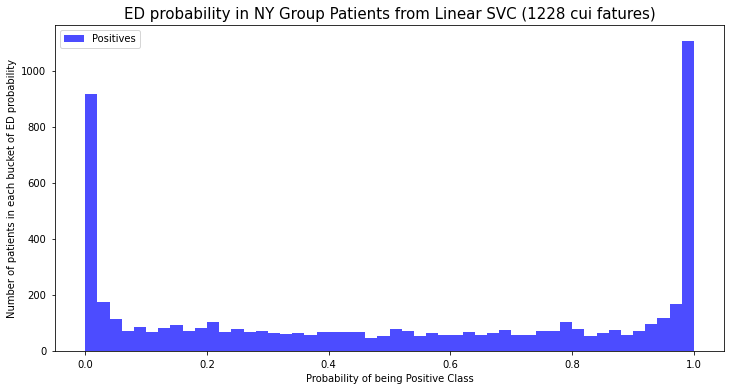

In [373]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
#plt.hist(prediction[y==0], bins=50, label='Negatives')
plt.hist(Dp['ED probability'], bins=50, label='Positives', alpha=0.7, color='b')
plt.xlabel('Probability of being Positive Class', fontsize=10)
plt.ylabel('Number of patients in each bucket of ED probability', fontsize=10)
#plt.title('ED probability in NY Group Patients from Linear SVC (521 cui fatures)', fontsize=15)
plt.title('ED probability in NY Group Patients from Linear SVC (1228 cui fatures)', fontsize=15)
plt.legend(fontsize=10)
plt.tick_params(axis='both', labelsize=10, pad=5)
plt.show() 

In [227]:
# 2. SVC with selected feattures
#X_test_new1,X_test_ny_new

In [59]:
import numpy as np
np.random.seed(1234)

In [60]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# SVM kernel='linear' best : 'C': 100, 'gamma': 0.1
c=100
gamma=0.1

# Linear kernel SVM
svm_L = SVC(kernel='linear', C=c, gamma=gamma, random_state=42) 
#svm_L.fit(X_train_scaled, y_train)


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_L, X_train_new, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Cross-validated scores: [0.92109777 0.93567753 0.91595197 0.93567753 0.92188841]
Accuracy: 0.926 (0.008)


Classification of SVM linear: Accuracy 0.788
Unweighted Recall of the model is : 0.7884
[[595 142]
 [171 571]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       737
           1       0.80      0.77      0.78       742

    accuracy                           0.79      1479
   macro avg       0.79      0.79      0.79      1479
weighted avg       0.79      0.79      0.79      1479



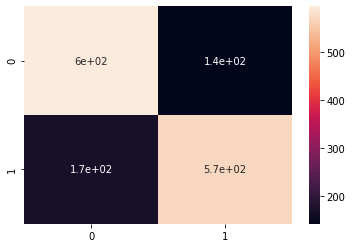

In [61]:
#perform prediction on X_test_scaled : X_test_new1
y_pred = cross_val_predict(svm_L, X_test_new1, y_test, cv=5)
#plt.scatter(y_test, y_pred)

# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_test= accuracy_score(y_test, y_pred)
print( "Classification of SVM linear: Accuracy " + str(round(accuracy_test,3)))
UAR = recall_score(y_test, y_pred , average="macro")
print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)


print(cf_matrix)
# Classification report, includes accuracy
print(classification_report(y_test, y_pred))

In [380]:
#lsvc = LinearSVC(C=100, penalty="l1", dual=False).fit(X_train_NY_scaled, y_train)
#model = SelectFromModel(lsvc, prefit=True)
#X_train_NY_new = model.transform(X_train_NY_scaled)
#print(X_train_NY_new.shape)
#X_NY_new = model.transform(X_NY_scaled)

#c_ny=lsvc.coef_

#print(X_test_new.shape)

In [381]:
import numpy as np
np.random.seed(1234)

In [382]:
#perform prediction on X_test_new with X_train_NY_new : 
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# SVM kernel='linear' best : 'C': 1.0, 'gamma': 0.1
c=100
gamma=0.1

# Linear kernel SVM
svm_L = SVC(kernel='linear', C=c, gamma=gamma, random_state=42) 
#svm_L.fit(X_train_scaled, y_train)


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(svm_L, X_train_NY_new, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Cross-validated scores: [0.9948542  0.99399657 0.9948542  0.9922813  0.99656652]
Accuracy: 0.995 (0.001)


Classification of SVM linear: Accuracy 0.979
Unweighted Recall of the model is : 0.979
[[719  18]
 [ 13 729]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       737
           1       0.98      0.98      0.98       742

    accuracy                           0.98      1479
   macro avg       0.98      0.98      0.98      1479
weighted avg       0.98      0.98      0.98      1479



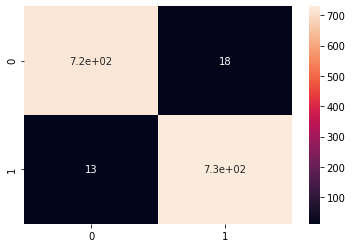

In [383]:
#perform prediction on X_test_scaled : X_test_ny_new
y_pred = cross_val_predict(svm_L, X_test_ny_new, y_test, cv=5)
#plt.scatter(y_test, y_pred)

# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_test= accuracy_score(y_test, y_pred)
print( "Classification of SVM linear: Accuracy " + str(round(accuracy_test,3)))
UAR = recall_score(y_test, y_pred , average="macro")
print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)


print(cf_matrix)
# Classification report, includes accuracy
print(classification_report(y_test, y_pred))

In [384]:
## Check selected cuis features names
##NY sample1
# # /V_33_S.SVC_F_selected.csv, V_33.NY.SVC_NY_selected.csv

In [385]:
#SVC_F_selected.to_csv('C:\\Users\\Scarlet\\Documents\\Publishing/V_33_S.SVC_F_selected_df.csv', index=True)
#SVC_NY_selected.to_csv('C:\\Users\\Scarlet\\Documents\\Publishing/V_33.NY.SVC_NY_selected_df.csv', index=True)

In [386]:
import pandas as pd
#SVC_F_importance=pd.read_csv(DATA_DIR + "V_33.SVC_F_importance.csv")
#SVC_F_selected=pd.read_csv(DATA_DIR + "V_33_S.SVC_F_selected_df.csv")

In [35]:
SVC_F_importance.head()

,feature name,coef,T_F
0,C0000473,0.000,0
0,C0000503,2.185,1
0,C0000726,0.000,0
0,C0000727,0.000,0
0,C0000729,0.000,0


In [41]:
SVC_F_selected.head()

,feature name,coef,T_F
0,C0000503,2.185,1
0,C0001168,-0.213,1
0,C0001465,-1.152,1
0,C0001675,-4.548,1
0,C0001779,0.552,1


In [198]:
#SVC_F_importance['feature name'][2:].tolist()

In [36]:
from py2neo import Node, Relationship, Graph
# from igraph import Graph as iGraph

In [37]:
graph = Graph("http://10.200.112.233:7474/db/data/", user="scarlett", password="Admin123")

In [38]:
# {id:'""" + cui + """' }
#  RETURN p.cui, p.name, """
def cui2name(cui):
    query = """
        MATCH (p:Concepts{id:'""" + cui + """' })
        RETURN p.name"""
    return (graph.run(query).to_series()).tolist()


In [384]:
#  RETURN p.cui, p.name, c.cui, c.name"""
#def cui2name2(cui):
#    query = """
 #       MATCH (p:Concepts)<-[r:cui_2_cui*0..{relation:'isa'}]-(c:Concepts{id:'""" + cui + """' }) 
 #       RETURN c.cui, c.name"""
#    return graph.run(query).to_data_frame()

In [245]:
cui2name('C0000473')
#'C0494574'

['4-Aminobenzoic Acid']

In [246]:
#df['examples'] = df['n.tui'].apply(lambda x: example_cui(x))

In [39]:
SVC_F_importance['name']=SVC_F_importance['feature name'].apply(lambda x: cui2name(x))

In [43]:
SVC_F_selected['name']=SVC_F_selected['feature name'].apply(lambda x: cui2name(x))

<ipython-input-43-91eddc8b8663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SVC_F_selected['name']=SVC_F_selected['feature name'].apply(lambda x: cui2name(x))


In [40]:
SVC_F_importance.head()

,feature name,coef,T_F,name
0,C0000473,0.000,0,[4-Aminobenzoic Acid]
0,C0000503,2.185,1,[gamma hydroxybutyrate]
0,C0000726,0.000,0,[Abdomen]
0,C0000727,0.000,0,"[Abdomen, Acute]"
0,C0000729,0.000,0,[Abdominal Cramps]


In [44]:
SVC_F_selected.head()

,feature name,coef,T_F,name
0,C0000503,2.185,1,[gamma hydroxybutyrate]
0,C0001168,-0.213,1,[Complete obstruction]
0,C0001465,-1.152,1,[Adenosine Monophosphate]
0,C0001675,-4.548,1,[Adult]
0,C0001779,0.552,1,[Age]


In [45]:
def cui2tui(cui):
    query = """
        MATCH (a:Types) <-[r:cui_2_tui]-(d:Concepts)
        WHERE d.id IN ['""" + cui + """']
        RETURN a.name"""
    return (graph.run(query).to_series()).tolist()

In [46]:
def cui2id(cui):
    query = """
        MATCH (a:Types) <-[r:cui_2_tui]-(d:Concepts)
        WHERE d.id IN ['""" + cui + """']
        RETURN a.id"""
    return (graph.run(query).to_series()).tolist()

In [47]:
def cui2scv(cui):
    query = """
        MATCH (sc: Terms)- [r:aui_2_cui]->(con:Concepts)
        WHERE con.id IN ['""" + cui + """']
        RETURN sc.vocabulary"""
    return (graph.run(query).to_series()).tolist()

In [48]:
def cui2scot(cui):
    query = """
        MATCH (sc: Terms)- [r:aui_2_cui]->(con:Concepts)
        WHERE con.id IN ['""" + cui + """']
        RETURN sc.other_code"""
    return (graph.run(query).to_series()).tolist()

In [49]:
def cui2scid(cui):
    query = """
        MATCH (sc: Terms)- [r:aui_2_cui]->(con:Concepts)
        WHERE con.id IN ['""" + cui + """']
        RETURN sc.id"""
    return (graph.run(query).to_series()).tolist()

In [50]:
def cui2scname(cui):
    query = """
        MATCH (sc: Terms)- [r:aui_2_cui]->(con:Concepts)
        WHERE con.id IN ['""" + cui + """']
        RETURN sc.name"""
    return (graph.run(query).to_series()).tolist()

In [ ]:
#SVC_F_selected['name']=SVC_F_selected['feature name'].apply(lambda x: cui2name(x))

In [52]:
df2=SVC_F_selected

In [53]:
df2['type_name']=df2['feature name'].apply(lambda x: cui2tui(x))

<ipython-input-53-2df8cc9a473a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type_name']=df2['feature name'].apply(lambda x: cui2tui(x))


In [54]:
df2['type_id']=df2['feature name'].apply(lambda x: cui2id(x))

<ipython-input-54-b64ec94e028e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type_id']=df2['feature name'].apply(lambda x: cui2id(x))


In [55]:
df2.head()

,feature name,coef,T_F,name,type_name,type_id
0,C0000503,2.185,1,[gamma hydroxybutyrate],"[Organic Chemical, Pharmacologic Substance]","[T109, T121]"
0,C0001168,-0.213,1,[Complete obstruction],[Acquired Abnormality],[T020]
0,C0001465,-1.152,1,[Adenosine Monophosphate],"[Nucleic Acid, Nucleoside, or Nucleotide, Biol...","[T114, T123, T121]"
0,C0001675,-4.548,1,[Adult],[Age Group],[T100]
0,C0001779,0.552,1,[Age],[Organism Attribute],[T032]


In [ ]:
#df2['sc_voc']=df2['feature name'].apply(lambda x: cui2scv(x))

#df2['sc_othcode']=df2['feature name'].apply(lambda x: cui2scot(x))

# cui2scid
#df2['sc_id']=df2['feature name'].apply(lambda x: cui2scid(x))

#cui2scname
#df2['sc_name']=df2['feature name'].apply(lambda x: cui2scname(x))

In [56]:
SVC_F_selected=df2

In [57]:
SVC_F_selected.head()

,feature name,coef,T_F,name,type_name,type_id
0,C0000503,2.185,1,[gamma hydroxybutyrate],"[Organic Chemical, Pharmacologic Substance]","[T109, T121]"
0,C0001168,-0.213,1,[Complete obstruction],[Acquired Abnormality],[T020]
0,C0001465,-1.152,1,[Adenosine Monophosphate],"[Nucleic Acid, Nucleoside, or Nucleotide, Biol...","[T114, T123, T121]"
0,C0001675,-4.548,1,[Adult],[Age Group],[T100]
0,C0001779,0.552,1,[Age],[Organism Attribute],[T032]


In [414]:
SVC_F_importance.to_csv(DATA_DIR + "V_33.F.SVC_F_importance_nameF.csv", index=True)

In [58]:
SVC_F_selected.to_csv(DATA_DIR + "V_33.F.SVC_F_selected.csv", index=True)

In [250]:
#############################???

In [251]:
#temp=SVC_F_importance[abs(SVC_F_importance.coef >1)]

print(len(SVC_F_importance[abs(SVC_F_importance.coef > 5)]))
temp=SVC_F_importance[abs(SVC_F_importance.coef >5)]

18


In [412]:
temp.sort_values(by=['coef'],ascending=False)

,Unnamed: 0,feature name,coef,T_F,name
525,0,C0009676,37.904,1,[Confusion]
1427,0,C0025552,13.203,1,[Metals]
3793,0,C0231474,12.961,1,[Decerebrate Posturing]
3986,0,C0237963,9.840,1,[Poisoning by acetaminophen]
1280,0,C0023380,8.656,1,[Lethargy]
3876,0,C0233407,8.055,1,[Disorientation]
6214,0,C0560522,7.947,1,[Unable to reach]
4703,0,C0337488,7.491,1,[Stepmother]
1848,0,C0033873,7.111,1,[Psychiatry Specialty]
5151,0,C0429622,6.778,1,[Oxygen delivery]


### VIII. Machine Learning Model_Supervised Learning Random Forest Classifier

#### 1.  Implementing an RF Classifier : Predict ED
- Implement a 'naive' RF classifier using the default parameters
1. Split our data into training and testing samples.
2. Initialise a RF classifier using all default parameters
3. Train the RF using the .fit function and the training data+labels :X_train_scaled, y_train
4. Extract the classifier's predictions on test data (X_test_scaled) using the .predict function
5. Examine the classifier's performance on unseen data (y_test) by comparing with the classifier's predictions (y_pred)

In [62]:
# Required Libraries are imported
from numpy import mean
from numpy import std
import warnings  
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import confusion_matrix
import time
#import scikitplot as skplt
import itertools
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [63]:
import numpy as np
np.random.seed(1234)

In [389]:
from sklearn.ensemble import RandomForestClassifier 
from pprint import pprint


#1.Create a Random Forest Classifer. 

naive_classifier = RandomForestClassifier()
naive_classifier.fit(X_train_scaled, y_train)  
y_pred= naive_classifier.predict(X_test_scaled)  
print(classification_report(y_test, y_pred))

pprint(naive_classifier.get_params())

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       737
           1       0.88      0.95      0.91       742

    accuracy                           0.91      1479
   macro avg       0.91      0.91      0.91      1479
weighted avg       0.91      0.91      0.91      1479

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [390]:
#### 2.Create an 'improved' Model by Tuning the Hyperparameters

In [391]:
import numpy as np
np.random.seed(1234)

# set up possible values of parameters to optimize over
parameter_grid = {
            "min_samples_leaf": [1,50,100],
            'n_estimators': [10,100,300],
             'max_features' : [2,3,5,7]
}

# 3.1.Create a gridsearch object with the random forest classifier and parameter_grid,5-fold cross validation
#classifier_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter_grid, cv=5)


In [392]:
#### 3.Using cross validation to tune a RF classifier for a given hyperparameter grid.

In [393]:
import numpy as np
np.random.seed(1234)
# 3.1.Create a gridsearch object with the random forest classifier and parameter_grid,5-fold cross validation
classifier_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameter_grid, cv=5)

In [394]:
# 3.2.Fit the cross validated grid search on the data 
classifier_grid.fit(X_train_scaled, y_train)

print(" The best parameters found are: ")
classifier_grid.best_params_

 The best parameters found are: 


{'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 100}

Cross-validated scores: [0.8516295  0.85077187 0.83876501 0.86277873 0.83519313]
Accuracy: 0.848 (0.010)
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       737
           1       0.81      0.82      0.82       742

    accuracy                           0.82      1479
   macro avg       0.82      0.82      0.82      1479
weighted avg       0.82      0.82      0.82      1479

Classification of RM: Accuracy 0.815
Unweighted Recall of the model is : 0.8154
[[598 139]
 [134 608]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       737
           1       0.81      0.82      0.82       742

    accuracy                           0.82      1479
   macro avg       0.82      0.82      0.82      1479
weighted avg       0.82      0.82      0.82      1479



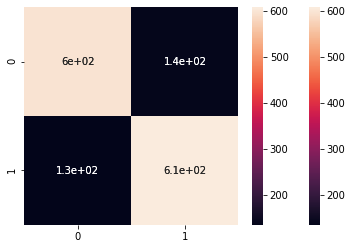

In [395]:
# 3.3.the best parameters and 5-fold cross validation
from sklearn.model_selection import KFold

best_model = classifier_grid.best_estimator_


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(best_model, X_train_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


# 3.4 evaluating the best model's performance

#perform prediction on X_test_scaled
y_pred = cross_val_predict(best_model, X_test_scaled, y_test, cv=5)
#y_pred= best_model.predict(X_test_scaled) 
print(classification_report(y_test, y_pred))


# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_devel= accuracy_score(y_test, y_pred)

print( "Classification of RM: Accuracy " + str(round(accuracy_devel,3)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

UAR = recall_score(y_test, y_pred , average="macro")

print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(cf_matrix)
# classification report, includes accuracy
print(classification_report(y_test, y_pred))

In [260]:
# 3.2.2Fit the cross validated grid search on the data :(X_train_NY_scaled, y_train) X_TEST_NY_scaled

classifier_grid.fit(X_train_NY_scaled, y_train)

print(" The best parameters found are: ")
classifier_grid.best_params_

 The best parameters found are: 


{'max_features': 7, 'min_samples_leaf': 1, 'n_estimators': 300}

Cross-validated scores: [0.8567753  0.86792453 0.84734134 0.864494   0.85150215]
Accuracy: 0.858 (0.008)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       737
           1       0.83      0.83      0.83       742

    accuracy                           0.83      1479
   macro avg       0.83      0.83      0.83      1479
weighted avg       0.83      0.83      0.83      1479

Classification of RM: Accuracy 0.832
Unweighted Recall of the model is : 0.8323
[[613 124]
 [124 618]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       737
           1       0.83      0.83      0.83       742

    accuracy                           0.83      1479
   macro avg       0.83      0.83      0.83      1479
weighted avg       0.83      0.83      0.83      1479



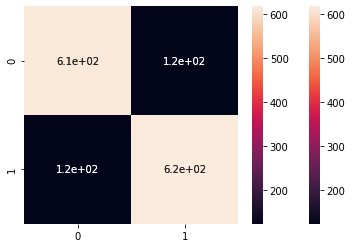

In [396]:
# 3.3.the best parameters and 5-fold cross validation :X_train_NY_scaled, X_TEST_NY_scaled
from sklearn.model_selection import KFold

best_model2 = classifier_grid.best_estimator_


# Perform 5-fold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(best_model2, X_train_NY_scaled, y_train, scoring='accuracy', cv=cv,n_jobs=-1)
print ('Cross-validated scores:', scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


# 3.4 evaluating the best model's performance

#perform prediction on X_test_scaled
y_pred = cross_val_predict(best_model2, X_TEST_NY_scaled, y_test, cv=5)
#y_pred= best_model.predict(X_test_scaled) 
print(classification_report(y_test, y_pred))


# score the performance using accuracy and plots the resulting confusion matrix
#Test accuracy on the NY data
accuracy_devel= accuracy_score(y_test, y_pred)

print( "Classification of RM: Accuracy " + str(round(accuracy_devel,3)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

UAR = recall_score(y_test, y_pred , average="macro")

print( "Unweighted Recall of the model is : " + str(round(UAR, 4)))

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(cf_matrix)
# classification report, includes accuracy
print(classification_report(y_test, y_pred))

#### 2. Random Forest Classifier
To sum up, when considering the above all as summarized as below, we can choose () to detect ED patients from ED Clinical text notes(cuis).


Specificity = TN/ (FP+TN): For all patients that were actually “Not ED”, was classified correctly
Sensitivity = TP/(FN+TP) : For all patients that were actually “ED”, 83% (84%) was classified correctly
Accuracy : SVC show the best accuracy rate as 89% (82%)
F1 score : weighted harmonic mean of precision and recall is 0.85 (0.83) for Random Forest.

#### 3. Visualising Feature Importance

- Because RFs combine many trees, each of which performs classification on a subset of the features, then some features are evidently better than others in predicting the outcomes.

In [397]:
# ED_train
ED_train.columns[[range(1,ED_train.shape[1])]]

Index(['C0000503', 'C0000726', 'C0000727', 'C0000729', 'C0000731', 'C0000734',
       'C0000737', 'C0000739', 'C0000768', 'C0000786',
       ...
       'C4533256', 'C4533435', 'C4533677', 'C4534306', 'C4534314', 'C4534363',
       'C4534364', 'C4540159', 'C4546278', 'C4547399'],
      dtype='object', length=10238)

In [398]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# feature importance  
from sklearn.ensemble import RandomForestClassifier 
from pprint import pprint

feature_importance_vector = best_model.feature_importances_
pprint(feature_importance_vector)

feature_names=ED_train.columns[[range(1,ED_train.shape[1])]]


# feature importances
column_names = ["feature_names", "importances"]
F_I = pd.DataFrame(columns = column_names)

feature_names=[]
importances =[]
for name, importance in zip(ED_train.columns[[range(1,ED_train.shape[1])]], best_model.feature_importances_):
    print(name, "=", importance)
    #i=pd.DataFrame(data = zip(name, importance), columns=['feature_names', 'importances'])
    #print(i)
    feature_names.append(name)
    importances.append(importance)
F_I = pd.DataFrame(
    {'feature_names': feature_names,
     'importances': importances
    })



array([0.00000000e+00, 0.00000000e+00, 6.20266772e-04, ...,
       0.00000000e+00, 0.00000000e+00, 9.08404379e-05])
C0000503 = 0.0
C0000726 = 0.0
C0000727 = 0.0006202667724467
C0000729 = 1.3216980036950107e-05
C0000731 = 8.168624856163431e-06
C0000734 = 0.00015688517675131356
C0000737 = 1.790300952286961e-05
C0000739 = 0.00040109758538725885
C0000768 = 3.0231219314238315e-05
C0000786 = 7.560611333066532e-05
C0000833 = 1.271416565416225e-08
C0000889 = 0.00012811998003685012
C0000921 = 3.105433309076348e-05
C0000924 = 0.0001751012229765301
C0000925 = 7.651629009707181e-06
C0000938 = 5.65952877577156e-05
C0000970 = 0.00013057886404431248
C0000975 = 0.0002910467703187963
C0000981 = 1.6339256996548988e-07
C0001047 = 0.0
C0001074 = 2.9127220468951114e-05
C0001122 = 3.176287347064134e-05
C0001125 = 0.0001173470484864377
C0001126 = 1.7519303436679615e-05
C0001127 = 2.547428507554895e-06
C0001128 = 2.0954393808831827e-05
C0001138 = 7.000643823251349e-05
C0001168 = 0.0
C0001175 = 5.6715280351829

In [399]:
X_train = ED_train.values
X_test = ED_test.values

print(X_train.shape)
print(X_test.shape)

# NY data :smaple1
X_NY = ED_NY2.values
X_TR_NY=ED_train2_NY.values
print(X_NY.shape)
print(X_TR_NY.shape)

from os import listdir

(5829, 10239)
(1479, 10239)
(7155, 10022)
(5829, 10022)


In [ ]:
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# feature importance  :X_train_NY_scaled, X_TEST_NY_scaled
from sklearn.ensemble import RandomForestClassifier 
from pprint import pprint

feature_importance_vector2 = best_model2.feature_importances_
pprint(feature_importance_vector2)

feature_names=ED_train2_NY.columns[[range(1,ED_train2_NY.shape[1])]]


# feature importances
column_names = ["feature_names", "importances"]
F_I2 = pd.DataFrame(columns = column_names)

feature_names=[]
importances =[]
for name, importance in zip(ED_train2_NY.columns[[range(1,ED_train2_NY.shape[1])]], best_model2.feature_importances_):
    print(name, "=", importance)
    #i=pd.DataFrame(data = zip(name, importance), columns=['feature_names', 'importances'])
    #print(i)
    feature_names.append(name)
    importances.append(importance)
F_I2 = pd.DataFrame(
    {'feature_names': feature_names,
     'importances': importances
    })

array([0.00000000e+00, 0.00000000e+00, 6.20266772e-04, ...,
       0.00000000e+00, 0.00000000e+00, 9.08404379e-05])
C0189661 = 0.0
C0234192 = 0.0
C0368753 = 0.0006202667724467
C0520679 = 1.3216980036950107e-05
C0005854 = 8.168624856163431e-06
C0447546 = 0.00015688517675131356
C0076107 = 1.790300952286961e-05
C0085681 = 0.00040109758538725885
C1456357 = 3.0231219314238315e-05
C2348609 = 7.560611333066532e-05
C4526583 = 1.271416565416225e-08
C1275581 = 0.00012811998003685012
C1517741 = 3.105433309076348e-05
C2584293 = 0.0001751012229765301
C0453850 = 7.651629009707181e-06
C0002766 = 5.65952877577156e-05
C0205464 = 0.00013057886404431248
C0597502 = 0.0002910467703187963
C2003864 = 1.6339256996548988e-07
C4321547 = 0.0
C0030471 = 2.9127220468951114e-05
C0231221 = 3.176287347064134e-05
C0011065 = 0.0001173470484864377
C0037199 = 1.7519303436679615e-05
C3854048 = 2.547428507554895e-06
C0748243 = 2.0954393808831827e-05
C0043197 = 7.000643823251349e-05
C2266790 = 0.0
C4524504 = 5.6715280351829

In [279]:
F_I

,feature_names,importances
0,C0000503,0.000642
1,C0000726,0.000009
2,C0000727,0.000001
3,C0000729,0.000222
4,C0000731,0.000230
...,...,...
10019,C4056536,0.000001
10020,C4061114,0.000053
10021,C4067967,0.000086
10022,C4067975,0.000062


In [402]:
print(len(F_I[F_I.importances >0.001]))
F_I[F_I.importances >0.001]

131


,feature_names,importances
67,C0001924,0.001710
203,C0004057,0.002279
212,C0004147,0.001395
290,C0005768,0.001477
318,C0006105,0.001120
...,...,...
9504,C3163846,0.001700
9604,C3639709,0.002250
9646,C3714541,0.002143
10077,C4086580,0.001908


In [403]:
from py2neo import Node, Relationship, Graph
# from igraph import Graph as iGraph

In [404]:
graph = Graph("http://10.200.112.233:7474/db/data/", user="scarlett", password="Admin123")

In [405]:
def cui2name(cui):
    query = """
        MATCH (p:Concepts{id:'""" + cui + """' })
        RETURN p.name"""
    return (graph.run(query).to_series()).tolist()

In [406]:
F_I['name']=F_I['feature_names'].apply(lambda x: cui2name(x))


In [407]:
F_I.to_csv(DATA_DIR + "V_35.F.RM_F_I_importance_nameF.csv", index=True)

In [65]:
import pandas as pd
F_I=pd.read_csv(DATA_DIR + "V_35.F.RM_F_I_importance_nameF.csv")

In [66]:
F_I.head()

,Unnamed: 0,feature_names,importances,name
0,0,C0000503,0.000000,['gamma hydroxybutyrate']
1,1,C0000726,0.000000,['Abdomen']
2,2,C0000727,0.000620,"['Abdomen, Acute']"
3,3,C0000729,0.000013,['Abdominal Cramps']
4,4,C0000731,0.000008,['Abdomen distended']


In [ ]:
df2=F_I

In [ ]:
df2['type_name']=df2['feature_names'].apply(lambda x: cui2tui(x))

In [67]:
df2['type_id']=df2['feature_names'].apply(lambda x: cui2id(x))

In [68]:
F_I=df2
F_I.head()

,Unnamed: 0,feature_names,importances,name,type_name,type_id
0,0,C0000503,0.000000,['gamma hydroxybutyrate'],"[Organic Chemical, Pharmacologic Substance]","[T109, T121]"
1,1,C0000726,0.000000,['Abdomen'],[Body Location or Region],[T029]
2,2,C0000727,0.000620,"['Abdomen, Acute']",[Sign or Symptom],[T184]
3,3,C0000729,0.000013,['Abdominal Cramps'],[Sign or Symptom],[T184]
4,4,C0000731,0.000008,['Abdomen distended'],[Finding],[T033]


In [69]:
F_I.to_csv(DATA_DIR + "V_35.F.RM_F_I_importance_nameF_2.csv", index=True)

In [ ]:
# Top ranking features

In [409]:
print(len(F_I[abs(F_I.importances > 0.002)]))
temp2=F_I[abs(F_I.importances > 0.002)]

27


In [413]:
temp2.sort_values(by=['importances'],ascending=False)

,feature_names,importances,name
4324,C0278140,0.006336,[Severe pain]
4306,C0277797,0.005113,[Apyrexial]
523,C0009758,0.004883,[conjunctiva]
3694,C0230003,0.003829,[Vertex]
4010,C0238775,0.003344,[Mass of urinary bladder]
1690,C0030706,0.003262,[Patient Rights]
3199,C0202762,0.003207,[Magnetic Resonance Imaging (MRI) of Neck]
6602,C0678227,0.002917,[Causing]
3403,C0205400,0.002911,[Thickened]
5207,C0439230,0.002716,[week]
